In [ ]:
# %%

import torch

loaded_query = torch.load("query_vector.pt")
print("Loaded Query Vector Shape:", loaded_query.shape)

Loaded Query Vector Shape: torch.Size([768])


In [ ]:
# %%

first_layer_keys = torch.load("first_layer_key.pt")
print("First Layer Keys Shape:", first_layer_keys.shape)
first_layer_values = torch.load("first_layer_value.pt")
print("First Layer Values Shape:", first_layer_values.shape)

First Layer Keys Shape: torch.Size([1, 12, 49, 64])
First Layer Values Shape: torch.Size([1, 12, 49, 64])


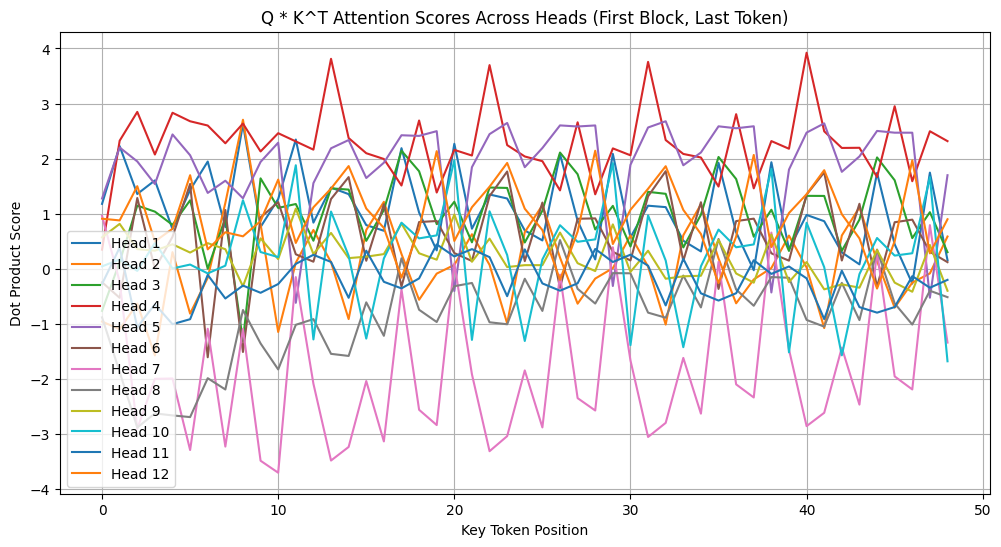

In [ ]:
# %%

# Assuming key and query are already defined
# key: (1, 12, 49, 64)
# query: (768,)
import matplotlib.pyplot as plt

# Reshape the query to match the multi-head format
num_heads = 12
head_dim = 64
reshaped_query = loaded_query.view(num_heads, head_dim)  # (12, 64)

# Remove batch dimension from key for simplicity
key = first_layer_keys[0]  # Shape: (12, 49, 64)

# Compute Q * K^T for each attention head
# Transpose the last two dimensions of key to get (12, 64, 49)
qk_product = torch.matmul(reshaped_query.unsqueeze(1), key.transpose(-1, -2))  # Shape: (12, 1, 49)

# Remove the singleton dimension
qk_product = qk_product.squeeze(1)  # Final shape: (12, 49)

# Visualize the attention scores across all heads

plt.figure(figsize=(12, 6))
for head in range(num_heads):
    plt.plot(qk_product[head].cpu().numpy(), label=f'Head {head + 1}')
plt.title("Q * K^T Attention Scores Across Heads (First Block, Last Token)")
plt.xlabel("Key Token Position")
plt.ylabel("Dot Product Score")
plt.legend()
plt.grid(True)
plt.show()